In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train = pd.read_csv('./data/train.csv', index_col='no')
test = pd.read_csv('./data/test.csv', index_col='no')

def strip_title(row):
    return row.strip()

# train 공백제거
# except pass 는 수치형나오면 오류나는거를 pass한것
for i in range(len(train.columns)):
    try:
        train.iloc[:,i] = train.iloc[:,i].apply(strip_title)
    except:
        pass
# test 공백제거
for i in range(len(test.columns)):
    try:
        test.iloc[:,i] = test.iloc[:,i].apply(strip_title)
    except:
        pass
    

In [28]:
# ?을 other로 변환
train['occupation'] = train['occupation'].replace('?','other')
train['workclass'] = train['workclass'].replace('?','other')
train['native-country'] = train['native-country'].replace('?','other')

# ?을 other로 변환
test['occupation'] = test['occupation'].replace('?','other')
test['workclass'] = test['workclass'].replace('?','other')
test['native-country'] = test['native-country'].replace('?','other')

In [29]:
train = train.drop('fnlwgt' , axis = 1)
test = test.drop('fnlwgt', axis =1)
train.drop("education", axis = 1, inplace = True)
test.drop("education", axis = 1, inplace = True)


In [34]:
train.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,0.035084,0.078498,0.054413,0.073100,0.238460
education-num,0.035084,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.078498,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.054413,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.073100,0.147569,0.088609,0.055271,1.000000,0.231045
income,0.238460,0.331798,0.221387,0.135645,0.231045,1.000000


<AxesSubplot:xlabel='education-num', ylabel='count'>

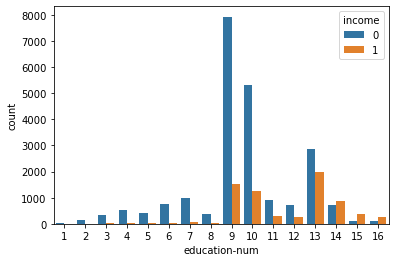

In [5]:
ax = sns.countplot(data = train, x='education-num', hue='income')
ax

In [20]:
train

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,
1,25,Private,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [19]:
train[['occupation']]

,occupation
no,
1,Machine-op-inspct
2,Other-service
3,Handlers-cleaners
4,Tech-support
5,Transport-moving
...,...
29301,Sales
29302,Sales
29303,Farming-fishing


In [15]:
train['occupation'].value_counts()

Prof-specialty       3724
Craft-repair         3632
Exec-managerial      3609
Adm-clerical         3440
Sales                3292
Other-service        2975
Machine-op-inspct    1811
other                1668
Transport-moving     1393
Handlers-cleaners    1249
Farming-fishing       888
Tech-support          865
Protective-serv       603
Priv-house-serv       146
Armed-Forces           10
Name: occupation, dtype: int64

In [16]:
# categorical_features = ['Prof-specialty','Craft-repair','Exec-managerial','Adm-clerical','Sales','Other-service'
#                        ,'Machine-op-inspct','other','Transport-moving','Handlers-cleaners','Farming-fishing',
#                        'Tech-support','Protective-serv','Priv-house-serv','Armed-Forces']

In [21]:
categorical_features = ['occupation']

In [22]:
for feature_name in categorical_features:
    one_hot = pd.get_dummies(train[feature_name], prefix = feature_name)
    train = pd.concat([train, one_hot], axis = 1) # 기존 데이터 끝에 one_hot을 붙임
    train.drop(feature_name, axis = 1, inplace = True) # 기존 글자 컬럼을 삭제

In [23]:
for feature_name in categorical_features:
    one_hot = pd.get_dummies(test[feature_name], prefix = feature_name)
    test = pd.concat([test,one_hot], axis=1) # 기존 데이터 끝에 one_hot을 붙임.
    test.drop(feature_name, axis=1, inplace=True) # 기존 글자컬럼을 삭제

In [25]:
train.corr()

,age,education-num,capital-gain,capital-loss,hours-per-week,income,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_other
age,1.000000,0.035084,0.078498,0.054413,0.073100,0.238460,-0.037516,-0.011641,0.008755,0.098262,...,-0.089044,-0.013103,-0.081817,0.018611,0.052595,0.000814,-0.031907,-0.021934,0.027034,0.028833
education-num,0.035084,1.000000,0.127651,0.083925,0.147569,0.331798,0.002775,-0.001316,-0.137739,0.198739,...,-0.123739,-0.158979,-0.171442,-0.068471,0.415499,0.004762,0.032144,0.061117,-0.115410,-0.079279
capital-gain,0.078498,0.127651,1.000000,-0.031401,0.088609,0.221387,-0.032803,-0.002673,-0.018412,0.059667,...,-0.023184,-0.025154,-0.039199,-0.008278,0.084936,-0.004170,0.011894,-0.008920,-0.021096,-0.017226
capital-loss,0.054413,0.083925,-0.031401,1.000000,0.055271,0.135645,-0.019203,0.004680,-0.002985,0.040121,...,-0.016577,-0.013269,-0.039996,-0.011521,0.043729,0.003887,0.005870,0.007687,-0.008003,-0.006323
hours-per-week,0.073100,0.147569,0.088609,0.055271,1.000000,0.231045,-0.080366,-0.001558,0.055519,0.139131,...,-0.035939,0.006929,-0.150740,-0.042649,0.057498,0.029268,0.009413,-0.013825,0.069206,-0.168357
income,0.238460,0.331798,0.221387,0.135645,0.231045,1.000000,-0.091540,0.002577,-0.012879,0.211750,...,-0.085888,-0.065123,-0.154994,-0.036405,0.186231,0.027584,0.029231,0.017953,-0.019846,-0.077891
occupation_Adm-clerical,-0.037516,0.002775,-0.032803,-0.019203,-0.080366,-0.091540,1.000000,-0.006738,-0.137170,-0.136673,...,-0.076947,-0.093597,-0.122586,-0.025806,-0.139145,-0.052860,-0.129735,-0.063601,-0.081471,-0.089593
occupation_Armed-Forces,-0.011641,-0.001316,-0.002673,0.004680,-0.001558,0.002577,-0.006738,1.000000,-0.006949,-0.006924,...,-0.003898,-0.004742,-0.006210,-0.001307,-0.007049,-0.002678,-0.006573,-0.003222,-0.004127,-0.004539
occupation_Craft-repair,0.008755,-0.137739,-0.018412,-0.002985,0.055519,-0.012879,-0.137170,-0.006949,1.000000,-0.140960,...,-0.079360,-0.096533,-0.126431,-0.026615,-0.143510,-0.054518,-0.133804,-0.065596,-0.084026,-0.092403
occupation_Exec-managerial,0.098262,0.198739,0.059667,0.040121,0.139131,0.211750,-0.136673,-0.006924,-0.140960,1.000000,...,-0.079073,-0.096184,-0.125973,-0.026519,-0.142990,-0.054320,-0.133320,-0.065359,-0.083722,-0.092069
